In [1]:
import quizlib
quiz = quizlib.UnionQuiz()

# Union e-learning quiz
This notebook contains quiz questions meant to be completed after a lecture on the Union components, but can be used without. Feel free to use the McStasScript documentation as an aid, it can be found at [https://mads-bertelsen.github.io](https://mads-bertelsen.github.io), help on the Union components can be found in the tutorial section. The later parts of this quiz will use McStasScript as the interface to McStas, so it is suggested to do the McStasScript quiz first unless already familiar McStasScript. 

The learning goals
- Advantages of Union components
    - Understand in what situations the Union components are applicable
    - Understand the limitations
- Different Union component classes
    - Know the purpose of each Union component class
        - Process
        - Material
        - Geometry
        - Logger
        - Abs_logger
        - Conditional
        - Master
    - Understand how they work together
    - Understand priority system for geometry
- Write Union code
    - Define physical processes
    - Create materials
    - Describe a geometry
    - Log scattering with logger component
    - Include Union_master component
    - Perform simulation

## When to use the Union components
The first two questions relate to strengths and weaknesses of the Union components.

### Question 1
Which of the following is *not* a good reason to use Union components:
- A: Want to describe complex geometry
- B: Combination of physical processes in one geometry
- C: Multiple scattering between geometries / processes
- D: Model detector systems
- E: Logging of scattering
- F: Logging of absorption
- G: Gravity support
- H: Tracking of features in data

In [2]:
quiz.question_1("G")

Correct!
The Union components ignores gravity, so the Union components may not be the
right option if gravity effects are important in the described area.


### Question 2
Select the important limitation to remember when using Union components.

- A: No perfectly overlapping edges
- B: Maximum 10 geometries
- C: Maximum 5 processes in a material
- D: One Union system per instrument

In [3]:
quiz.question_2("A")

Correct!
Two geometries should overlap or be separate, not share a face.


## Classes of Union components
The next questions relate to the different classes of Union components. Most of these classes contain several components, but some only have a single. Each class have a different responsibility to perform, and are quite similar within one class. For example in the geometry class there are components describing spheres, cylinders, boxes and cones.

### Question 3
What does a process component do?

- A: Describes a number of scattering mechanisms
- B: Describes a scattering process
- C: Describes absorption

In [4]:
quiz.question_3("B")

Correct!
Yes! It describes a single scattering mechanism.


### Question 4
Which statement about a material in Union is true? (created by Union_make_material)

- A: Connects any single process to a absorption description
- B: Collects a number of processes and absorption description
- C: Materials are not user defined
- D: The position and rotation of material components are important

In [5]:
quiz.question_4("B")

Correct!
Yes, a material collects an arbitrary number of processes and one description of
absorption.


### Question 5
Which statement about geometry components below is true?

- A: Geometry components can take multiple material definitions
- B: Geometry components are optional for running a Union simulation
- C: The position and rotation of geometry components are important
- D: The geometry component performs the simulation

In [6]:
quiz.question_5("C")

Correct!
Yes, the geometry component describes something physical which is placed in
space.


### Question 6
What is the responsibility of a logger component?

- A: A logger records absorbed intensity
- B: A logger records scattering intensity
- C: A logger records the final state of the ray
- D: A logger always records positions

In [7]:
quiz.question_6("B")

Correct!
Yes, it records scattered intensity along some axis defined by the individual
logger component.


### Question 7
What is the responsibility of an abs_logger component?

- A: An abs_logger records the final weight of each ray
- B: An abs_logger needs to be connected to a specific geometry
- C: An abs_logger records scattering intensity
- D: An abs_logger records absorbed intensity

In [8]:
quiz.question_7("D")

Correct!
Yes, it records absorbed intensity along the path of the ray.


### Question 8
What is the purpose of a conditional component?

- A: A conditional component decides when a geometry is simulated
- B: A conditional component can affect exactly one other component
- C: A conditional component imposes a condition on logger or abs_logger components
- D: A conditional component is required to perform a simulation with Union components

In [9]:
quiz.question_8("C")

Correct!
Yes, it defines a condition on the final ray and imposes that on loggers /
abs_loggers.


### Question 9
Select the true statement about the Union_master component.

- A: There can only be one master component in an instrument
- B: A Union_master component is required to perform a simulation with Union components
- C: All Union components in an instrument file are simulated in a single master component
- D: The Union_master needs to be placed on a Union geometry

In [10]:
quiz.question_9("B")

Correct!
Yes, without a master the rays in McStas are not affected by anything Union.


### Question 10
Which statement about geometry priorities is true?

- A: The geometry with highest priority decides what material to be simulated
- B: The geometry with lowest priority decides what material to be simulated
- C: The priority of a geometry decides how likely it is a ray scatters from it

In [11]:
quiz.question_10("A")

Correct!
Yes, when multiple geometries cover a point, the one with highest priority
decides the material.


## Writing an instrument that use Union components
In the next section you will write a McStas simulation using the Union components. This will be achieved over many questions to provide feedback on each small step of the overall assignment.

### Question 11
Create a McStas instrument object with a incoherent process describing aluminium.
- cross section of 4*0.0082 barns per unit cell
- unit cell volume of 66.4 Å^3

In [12]:
import mcstasscript as ms

In [13]:
# Your code here
# instrument = ms.McStas_instr ...

instrument = ms.McStas_instr("demo_instrument")

Al_inc = instrument.add_component("Al_inc", "Incoherent_process")
Al_inc.sigma = 4*0.0082 # 4 atoms per unit cell
Al_inc.unit_cell_volume = 66.4

quiz.question_11(instrument)

Correct!
The incoherent process component was found with the right parameters


### Question 12
Add a powder process corresponding to aluminium.
- the McStas installation contains the datafile Al.laz

In [14]:
# Your code here
Al_pow = instrument.add_component("Al_pow", "Powder_process")
Al_pow.reflections = '"Al.laz"'

In [15]:
quiz.question_12(instrument)

Correct!
The powder process component was found with the right parameters


### Question 13
Create an aluminium material from the two defined processes.
- The inverse penetration depth for absorption of Al is $100 \cdot 4 \cdot 0.231 /66.4$ 1/m # barns [m^2 E-28]*Å^3 [m^3 E-30]=[m E-2]

In [16]:
# Your code here
Al = instrument.add_component("Al", "Union_make_material")
Al.process_string = '"Al_inc,Al_pow"'
Al.my_absorption = 100*4*0.231/66.4 # barns [m^2 E-28]*Å^3 [m^3 E-30]=[m E-2]

In [17]:
quiz.question_13(instrument)

Correct!
The material component was found with the right parameters


You now have a material definition! We will use this later when describing the sample holder. We will also need a single crystal material, some of the code for creating that is provided below. If your instrument object is not called instrument, uncomment the second line and provide your instrument object.

In [18]:
# This code assumes your instrument object is called 'instrument'
# instrument = my_instrument_object ...

sample_inc = instrument.add_component("Sample_inc", "Incoherent_process")
sample_inc.sigma = 100*2.105/173.28
sample_inc.unit_cell_volume = 173.28

sample_crystal = instrument.add_component("Sample_crystal", "Single_crystal_process")
sample_crystal.set_parameters(reflections='"YBaCuO.lau"', mosaic=15, packing_factor=0.5,
                              ax=3.8186, by=3.886, cz=11.6777)

instrument.add_parameter("twin_x", value=0, comment="twinning rotation around x axis [deg]")
instrument.add_parameter("twin_y", value=0, comment="twinning rotation around y axis [deg]")
instrument.add_parameter("twin_z", value=0, comment="twinning rotation around z axis [deg]")

Parameter named: 'twin_z' with value: 0
 [dimensionless]
 twinning rotation around z axis [deg]

### Question 14
We would like to simulate a twinned crystal, and for that we need to create an additional Single_crystal process exactly like the one above, but rotated slightly. Although process components completely ignores their given position, their roration can be used to set the orientation like one would rotate a normal component in McStas. Use the three defined parameters *twin_x*, *twin_y* and *twin_z* to define the rotation of the copied process.

Create a material using the Sample_inc, Sample_crystal and the process you added. The inverse penetration depth from absorption should be set to $\frac{100 \cdot 14.82 \text{b}}{173.28~\text{AA}^3}$ 1/m. The factor 100 originates from barn being $10^{-28}$ m$^2$ while $Å^3$ is $10^{-30}$ m$^3$, resulting in a factor 10$^2$ to reach units of 1/m.

In [19]:
# Your code here
sample_crystal_twin = instrument.add_component("Sample_crystal_twin", "Single_crystal_process")
sample_crystal_twin.set_parameters(reflections='"YBaCuO.lau"', mosaic=15, packing_factor=0.5)
sample_crystal_twin.set_parameters(ax=3.8186, by=3.886, cz=11.6777)
sample_crystal_twin.set_ROTATED(["twin_x", "twin_y", "twin_z"])

sample = instrument.add_component("Sample", "Union_make_material")
sample.process_string = '"Sample_inc,Sample_crystal,Sample_crystal_twin"'
sample.my_absorption = "100*14.82/173.28"

In [20]:
quiz.question_14(instrument)

Correct!
Twinned single crystal process found with correct parameters!
Correct!
The material component was found with all required processes!


### Question 15
Next we make a model of a laue camera, starting with the source. We will use Source_simple with the following parameters:
- width of 1 cm
- height of 3.5 cm
- focus window of 7 by 10 mm$^2$ at 1 m distance
- wavelength band of 4.5 Å with half width 4.0 Å
- flux of 1E13 

In [21]:
# Your code here
source = instrument.add_component("source", "Source_simple")
source.set_parameters(xwidth=0.01, yheight=0.035,
                      focus_xw=7.0E-3, focus_yh=1E-2, dist=1,
                      lambda0=4.5, dlambda=4.0, flux=1E13)

In [22]:
quiz.question_15(instrument)

Correct!
The source was found with the right parameters


### Question 16
Next we add two geometries, the twinned sample and an aluminium holder. The sample should be a small cylinder with the sample material placed relative to the source and 1 m after. The dimensions should be 3 mm radius and 1 cm height.

The aluminum holder should be a box that use the aluminium material defined earlier and be placed so that it is overlapping the sample slightly and holds the sample from either the left or right side (+/- x). In the overlapping region, the sample should be simulated, imagine a little groove was cut into the aluminium that the sample rests in.

In [23]:
# Your code here
sample_geometry = instrument.add_component("sample_geometry", "Union_cylinder")
sample_geometry.set_parameters(radius=3E-3, yheight=1E-2,
                               material_string='"Sample"', priority=100)
sample_geometry.set_AT([0,0,1], RELATIVE=source)

sample_holder = instrument.add_component("holder", "Union_box")
sample_holder.set_parameters(xwidth=2E-3, yheight=5E-2, zdepth=1E-2,
                             priority=50, material_string='"Al"')
sample_holder.set_AT([3.8E-3, 1.8E-2, 0], RELATIVE=sample_geometry)

In [24]:
quiz.question_16(instrument)

Correct!
The sample cylinder is set up correctly!
Correct!
The sample holder is set up correctly!


To visualize the geometry a logger component is added, here for the *zx* plane.

In [25]:
logger_zx = instrument.add_component("logger_space_zx", "Union_logger_2D_space")
logger_zx.set_parameters(D_direction_1='"z"', D1_min=-0.01, D1_max=0.01, n1=300,
                         D_direction_2='"x"', D2_min=-0.01, D2_max=0.01, n2=300,
                         filename='"logger_zx.dat"')

### Question 17
Use *set_RELATIVE* to place the logger at the same position as your sample. 


Add two copies of the logger with *zy* and *xy* as the directions and use the same placement.

In [26]:
# Your code here
logger_zx.set_RELATIVE(sample_geometry)

logger_zy = instrument.add_component("logger_space_zy", "Union_logger_2D_space",
                                     RELATIVE=sample_geometry)
logger_zy.set_parameters(D_direction_1='"z"', D1_min=-0.01, D1_max=0.01, n1=300,
                         D_direction_2='"y"', D2_min=-0.01, D2_max=0.01, n2=300,
                         filename='"logger_zy.dat"')

logger_xy = instrument.add_component("logger_space_xy", "Union_logger_2D_space",
                                     RELATIVE=sample_geometry)
logger_xy.set_parameters(D_direction_1='"x"', D1_min=-0.01, D1_max=0.01, n1=300,
                         D_direction_2='"y"', D2_min=-0.01, D2_max=0.01, n2=300,
                         filename='"logger_xy.dat"') 

In [27]:
quiz.question_17(instrument)

Correct!
Found a logger with the correct position!
Correct!
Found a logger with the correct position!
Correct!
Found a logger with the correct position!


### Question 18
Update your instrument to include a Union_master component.

In [28]:
# Your code here
instrument.add_component("master", "Union_master")

COMPONENT master = Union_master
AT [0, 0, 0] ABSOLUTE

In [29]:
quiz.question_18(instrument)

Correct!
The Union_master component was correctly added!


Since this tutorial is about the Union components, the monitors are added here to save some time.

In [30]:
# sample_object = ... # Provide the name of your sample object here

sample_object = sample_geometry
monitor = instrument.add_component("sphere_PSD", "PSD_monitor_4PI")
monitor.set_AT(0, RELATIVE=sample_object)
monitor.set_parameters(radius=0.5, filename='"psd_4PI.dat"', restore_neutron=1, nx=360, ny=180)

monitor = instrument.add_component("PSD", "PSD_monitor")
monitor.set_AT(0.3, RELATIVE=sample_object)
monitor.set_parameters(xwidth=0.8, yheight=0.8, nx=300, ny=300,
                       filename='"psd.dat"', restore_neutron=1)

L_monitor = instrument.add_component("L_monitor", "L_monitor")
L_monitor.set_AT(0.3, RELATIVE=sample_object)
L_monitor.set_parameters(xwidth=0.8, yheight=0.8, Lmin=0.5, Lmax=8.5, nL=300,
                       filename='"l_mon.dat"', restore_neutron=1)

### Understanding the constructed instrument
Before running simulations, lets take a look at the instrument object with the *show_diagram* method. The green lines denote connections between Union components. It should be clear that each process is used in a material, and that each geometry uses a material definition. The dashed arrow show which geometries are picked up by the *Union_master* component.

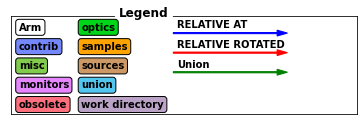

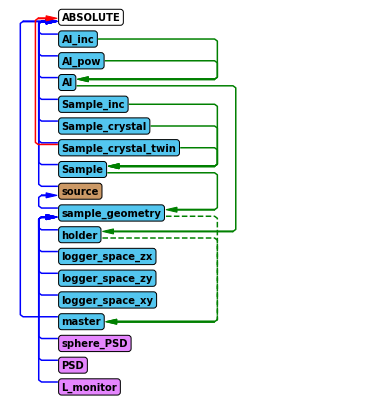

In [31]:
instrument.show_diagram()

## Performing a simulation with Union components
Now that you have prepared the instrument we can start to use it for simulations. Run the simulation with at least 5E6 neutrons.

In [32]:
%matplotlib widget
import mcstasscript.jb_interface as ms_widget
ms_widget.show(instrument)

### Question 19
How large does the *twin_x* parameter have to be before the results change significantly on the PSD monitor?

In [33]:
quiz.question_19(0.605) # clear seperation of peaks at 0.8 deg, allowed interval 0.6 to 1.2

Correct!
Yes, at about this amount of twinning the peaks start to split into two.


### Question 20
Which of the three twin angles have the least impact on the results on the L_monitor? It is assumed the other two are kept close to 0.
- A: twin_x
- B: twin_y
- C: twin_z

In [34]:
quiz.question_20("C")

Correct!
Exactly, it doesn't impact it at all (when the others are 0).


### Wavelength control
In the next cell we will add controls over the wavelength range of the source. Supply your source object.

In [35]:
# source = my_source_object
source.lambda0 = instrument.add_parameter("wavelength_center", value=4.5,
                                          comment="Center of wavelength range [Å]")
source.dlambda = instrument.add_parameter("wavelength_half_width", value=4.0,
                                          comment="Half width of wavelength interval [Å]")

# Updating Lmonitor as well
L_monitor.Lmin = "wavelength_center - wavelength_half_width"
L_monitor.Lmax = "wavelength_center + wavelength_half_width"

In [36]:
ms_widget.show(instrument)

### Question 21
Use the L_monitor data to select peaks to investigate with a narrow wavelength band around them.

In the question below, enter the center of the wavelength range selected and the number of aluminium bragg peaks visible in returned data.

In [37]:
quiz.question_21(7.84, 0)

The given wavelength correspond to a reflection!
Correct!
Yes, at this wavelength there are no aluminium bragg peaks from the sample
holder!


### Solution for question 21
- 2.55 +/- 0.1 : 2 forward 1 backward for Al, bragg peak hits sample holder on side
- 3.55 +/- 0.1 : 2 backward for Al, Bragg peak hits side and Al backscatters to crystal, creating line segments
- 3.86 +/- 0.1 : 2 backward for Al, Bragg peak hits side and Al backscatters to crystal, creating line segments
- 7.84 +/- 0.1 : 0 peaks for Al, perfect back scattering from sample